In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
ExtraTreesClassifier)
from xgboost.sklearn import XGBClassifier 

In [5]:
data=pd.read_excel('Churn_Case.xlsx','Case Data')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 13 columns):
ID                            6347 non-null int64
Customer Age (in months)      6347 non-null int64
Churn (1 = Yes, 0 = No)       6347 non-null int64
CHI Score Month 0             6347 non-null int64
CHI Score 0-1                 6347 non-null int64
Support Cases Month 0         6347 non-null int64
Support Cases 0-1             6347 non-null int64
SP Month 0                    6347 non-null float64
SP 0-1                        6347 non-null float64
Logins 0-1                    6347 non-null int64
Blog Articles 0-1             6347 non-null int64
Views 0-1                     6347 non-null int64
 Days Since Last Login 0-1    6347 non-null int64
dtypes: float64(2), int64(11)
memory usage: 644.7 KB


In [4]:
data.describe()

,ID,Customer Age (in months),"Churn (1 = Yes, 0 = No)",CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
count,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3174.000000,13.896802,0.050890,87.316685,5.058610,0.706318,-0.006932,0.812781,0.030169,15.727903,0.157240,96.310540,1.764613
std,1832.365411,11.160078,0.219791,66.282788,30.828767,1.723961,1.870942,1.320530,1.460336,42.119061,4.660607,3152.411673,17.966020
min,1.000000,0.000000,0.000000,0.000000,-125.000000,0.000000,-29.000000,0.000000,-4.000000,-293.000000,-75.000000,-28322.000000,-648.000000
25%,1587.500000,5.000000,0.000000,24.500000,-8.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-11.000000,0.000000
50%,3174.000000,11.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
75%,4760.500000,20.000000,0.000000,139.000000,15.000000,1.000000,0.000000,2.666667,0.000000,23.000000,0.000000,27.000000,3.000000
max,6347.000000,67.000000,1.000000,298.000000,208.000000,32.000000,31.000000,4.000000,4.000000,865.000000,217.000000,230414.000000,61.000000


In [6]:
data=data.rename(index=str, columns={'Churn (1 = Yes, 0 = No)':'Churn','Customer Age (in months)':'Customer Age',' Days Since Last Login 0-1':'Last Login'})

In [7]:
data.columns

Index(['ID', 'Customer Age', 'Churn', 'CHI Score Month 0', 'CHI Score 0-1',
       'Support Cases Month 0', 'Support Cases 0-1', 'SP Month 0', 'SP 0-1',
       'Logins 0-1', 'Blog Articles 0-1', 'Views 0-1', 'Last Login'],
      dtype='object')

In [8]:
data=data.drop('ID',axis=1)

In [8]:
data.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Last Login
0,67,0,0,0,0,0,0.0,0.0,0,0,0,31
1,67,0,62,4,0,0,0.0,0.0,0,0,-16,31
2,55,0,0,0,0,0,0.0,0.0,0,0,0,31
3,63,0,231,1,1,-1,3.0,0.0,167,-8,21996,0
4,57,0,43,-1,0,0,0.0,0.0,0,0,9,31


# churn
> Churn is the target column, it has two value 0 and 1, 0 mean customer acturally left in the two months following Dec 1st.

> Churn has a large imbalance with it's two value 

> 0 ： 6024

> 1 ：323

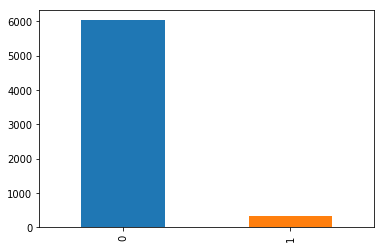

In [9]:
data['Churn'].value_counts().plot(kind='bar')
plt.show()

In [10]:
len(data[data['Customer Age']==2])

366

In [11]:
features=['CHI Score Month 0','CHI Score 0-1','Support Cases Month 0','Support Cases 0-1','SP Month 0','SP 0-1','Logins 0-1','Blog Articles 0-1','Views 0-1','Last Login']

Checking dash percentage for features

In [12]:
for f in features:
     print(str(f),'has:',round(len(data[data[f]==0])/len(data[f]),2),'% of dash')

CHI Score Month 0 has: 0.19 % of dash
CHI Score 0-1 has: 0.22 % of dash
Support Cases Month 0 has: 0.72 % of dash
Support Cases 0-1 has: 0.64 % of dash
SP Month 0 has: 0.72 % of dash
SP 0-1 has: 0.72 % of dash
Logins 0-1 has: 0.2 % of dash
Blog Articles 0-1 has: 0.57 % of dash
Views 0-1 has: 0.3 % of dash
Last Login has: 0.42 % of dash


Find out those rows which only has the customer age info while with no data in the other columns.There are 764 rows in such situation.

In [13]:
data[(data['Churn']==0)&(data['CHI Score Month 0']==0)&(data['CHI Score 0-1']==0)&(data['Support Cases Month 0']==0)&(data['Support Cases 0-1']==0)&(data['SP Month 0']==0)
&(data['SP 0-1']==0)&(data['Logins 0-1']==0)&(data['Blog Articles 0-1']==0)&(data['Views 0-1']==0)&(data['Last Login']==0)]['Customer Age'].value_counts()

1    371
2    355
3     34
9      1
6      1
5      1
0      1
Name: Customer Age, dtype: int64

> Observe those 764 rows, we found 1,2 month occupy large amount empty rows.It's probably because, in this period Customer just try to learn how to use service, so it's make sense there are no value in chi,views or login etc.If we check month 3, we will found there are more records about chi,support case, views and login etc.
We cannot recognized those 371+355 rows as missing value for two reasons. 1) new customers are trying to learn the service,so no data is make sense. 

> There are total 372 (1 month) customers and 366 (2 month) customers, if we delete them, then we would only have 1 row data for 1 month customers. And that one is churn=1, So, if we do that, our model will only learn 1 month customers prefer to leave. It will not see the situation for 1 month customer stay.  

> 2 month customers also same.

Monthly Churn rate = monthly customers left number (churn=1) / month customers number

In [14]:
for i in np.arange(67):
    print(round(len(data[(data['Customer Age']==i+1)&(data['Churn']==1)])/len(data[data['Customer Age']==i+1]),4))

0.0027
0.0109
0.0203
0.0212
0.0264
0.0471
0.0579
0.0417
0.0482
0.0332
0.0401
0.2066
0.1093
0.0777
0.0714
0.0903
0.0791
0.0886
0.0342
0.0381
0.0435
0.0364
0.0175
0.0943
0.0482
0.0556
0.1311
0.0482
0.0225
0.0923
0.0395
0.0345
0.0714
0.0189
0.0
0.0968
0.0857
0.0244
0.0
0.0625
0.1667
0.0323
0.0
0.0556
0.0
0.0
0.2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


ZeroDivisionError: division by zero

In [ ]:
df=pd.DataFrame({0.0027,
0.0109,
0.0203,
0.0212,
0.0264,
0.0471,
0.0579,
0.0417,
0.0482,
0.0332,
0.0401,
0.2066,
0.1093,
0.0777,
0.0714,
0.0903,
0.0791,
0.0886,
0.0342,
0.0381,
0.0435,
0.0364,
0.0175,
0.0943,
0.0482,
0.0556,
0.1311,
0.0482,
0.0225,
0.0923,
0.0395,
0.0345,
0.0714,
0.0189,
0.0,
0.0968,
0.0857,
0.0244,
0.0,
0.0625,
0.1667,
0.0323,
0.0,
0.0556,
0.0,
0.0,
0.2,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0}

### Ass1:Mr. Well (the case protagonist) believes that two important predictors of customer churn are Customer Age (i.e., tenure with QWE) and CHI score. Does your data analysis support these beliefs?

In [15]:
left = data[data['Churn']== 1] 
stay = data[data['Churn']== 0]
stay.shape

(6024, 12)

In [16]:
#import lib
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
ExtraTreesClassifier)

#plot
from matplotlib import pyplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Initiate model
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

# split data into X and y
X= data.drop(['Churn'], axis=1)
y=data['Churn']
X_columns=data.drop(['Churn'], axis=1).columns.values


#train model
rf.fit(X,y)
et.fit(X,y)
ada.fit(X,y)
gb.fit(X,y)
xg.fit(X,y)

# Get feature importance
rf_features =rf.feature_importances_
et_features = et.feature_importances_
ada_features = ada.feature_importances_
gb_features = gb.feature_importances_
xg_features=xg.feature_importances_

In [17]:
#Get feature importance 

feature_dataframe = pd.DataFrame( {
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'xg Boost feature importances': xg_features,
     'Gradient Boost feature importances': gb_features,
     'features': X_columns
})


In [18]:
feature_dataframe

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,xg Boost feature importances
0,0.22,0.184496,0.137663,0.185119,Customer Age,0.221298
1,0.20,0.138617,0.174732,0.146800,CHI Score Month 0,0.183028
2,0.14,0.139117,0.171101,0.132840,CHI Score 0-1,0.158070
3,0.02,0.012121,0.001415,0.015573,Support Cases Month 0,0.000000
4,0.06,0.020864,0.039150,0.027567,Support Cases 0-1,0.021631
5,0.00,0.007421,0.008283,0.011470,SP Month 0,0.008319
6,0.00,0.017780,0.002901,0.018890,SP 0-1,0.018303
7,0.10,0.121503,0.083982,0.120188,Logins 0-1,0.079867
8,0.08,0.060238,0.015735,0.045578,Blog Articles 0-1,0.021631
9,0.06,0.167770,0.171509,0.172732,Views 0-1,0.161398


In [19]:
# axis = 1 computes the mean row-wise
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by='mean',ascending=False)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,xg Boost feature importances,mean
0,0.22,0.184496,0.137663,0.185119,Customer Age,0.221298,0.189715
1,0.20,0.138617,0.174732,0.146800,CHI Score Month 0,0.183028,0.168635
2,0.14,0.139117,0.171101,0.132840,CHI Score 0-1,0.158070,0.148226
9,0.06,0.167770,0.171509,0.172732,Views 0-1,0.161398,0.146682
10,0.12,0.130074,0.193529,0.123242,Last Login,0.126456,0.138660
7,0.10,0.121503,0.083982,0.120188,Logins 0-1,0.079867,0.101108
8,0.08,0.060238,0.015735,0.045578,Blog Articles 0-1,0.021631,0.044636
4,0.06,0.020864,0.039150,0.027567,Support Cases 0-1,0.021631,0.033842
6,0.00,0.017780,0.002901,0.018890,SP 0-1,0.018303,0.011575
3,0.02,0.012121,0.001415,0.015573,Support Cases Month 0,0.000000,0.009822


In [20]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

### Ass2:Is there a natural customer segmentation with respect to churn risk that QWE should be thinking about? If so, what is it? What churn factors are particularly important in different segments? Or does the same set of factors impact all customers, and thus segmentation is not particularly useful?

> From the whole picture of the Customer Age.
There are large amount accounts (less than 6 months)

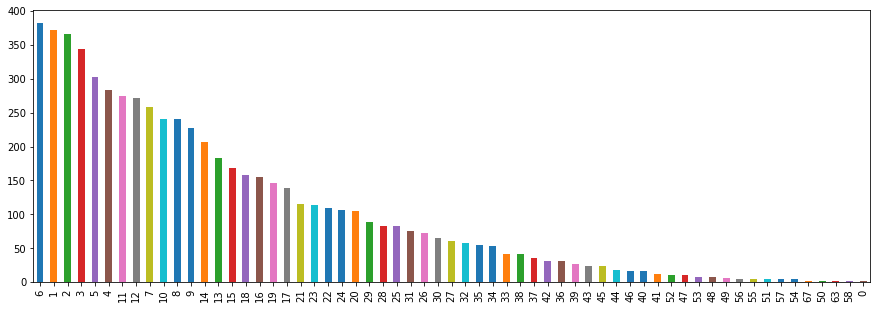

In [9]:
plt.figure(figsize=(15,5))
data['Customer Age'].value_counts().plot.bar()

### Churn Rate (Whole data)-Mid:(7-16]> Old:(16-67]>Young:(0-7]
> With the whole data field, we could divide the customer age to 3 categories based on quantiles : young:(0-7], mid:(7-16],old:(16-67]

> qcut:Discretize variable into equal-sized buckets based on rank or based on sample quantiles.

> Create a new feature 'CategoricalAge' and based on the new feature to calculate the churn rate for each age segmentation.

> The mid group has the highest precetage to churn, next one is old group,then the young group

In [10]:
data['CategoricalAge']= pd.qcut(data['Customer Age'], 3) 
print( data[['CategoricalAge', 'Churn']].groupby(['CategoricalAge'], as_index=False).mean() )

  CategoricalAge     Churn
0  (-0.001, 7.0]  0.025541
1    (7.0, 16.0]  0.080366
2   (16.0, 67.0]  0.051183


### Churn Rate (Left customers) -Young:(0.999-7-12]> Old:(16-47]>Mid:(12-16]
> Choose  subset data (Churn==1). We found 12-18 months customers occupy large percentage.

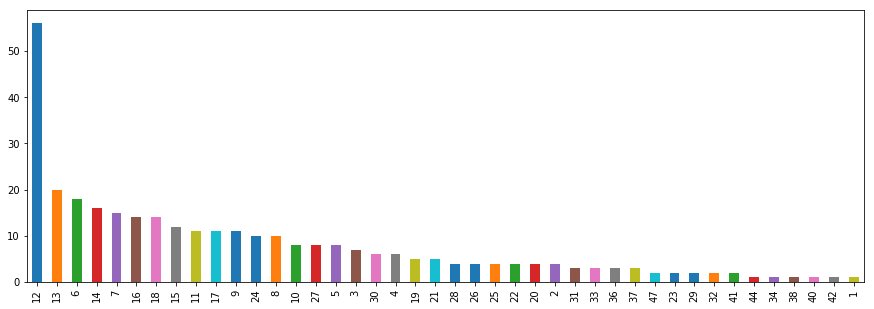

In [11]:
pd.qcut(data[data['Churn']==1]['Customer Age'],3)
plt.figure(figsize=(15,5))
data[data['Churn']==1]['Customer Age'].value_counts().plot.bar()

> In the subset data (Churn==1),based on quantiles to divede the age for 3 parts :(0.999, 12.0] ,(12.0, 16.0] ,(16.0, 47.0]

> we found month 12 not only occupies large percentage of the customer age,but also is the time most customer choose to churn, there are 56 customers left in this month. 

In [12]:
#data[data['Churn']==1]['Customer Age'].value_counts()
print('Row num of left customers between 0-12 month:',len(data[(data['Churn']==1)&(data['Customer Age']<=12)&(data['Customer Age']>0.999)])) #155
print('Row num of left customers between 13-16 month:',len(data[(data['Churn']==1)&(data['Customer Age']<=16)&(data['Customer Age']>12)])) #62
print('Row num of left customers between 17-47 month:',len(data[(data['Churn']==1)&(data['Customer Age']<=47)&(data['Customer Age']>16)]))#106

Row num of left customers between 0-12 month: 155
Row num of left customers between 13-16 month: 62
Row num of left customers between 17-47 month: 106


Churn Rate for -Young:(0.999-7-12]> Old:(16-47]>Mid:(12-16]

In [13]:
print('Young group:',round(len(data[(data['Churn']==1)&(data['Customer Age']<=12)&(data['Customer Age']>0.999)])/(len(data['Churn']==1)),4))
print('Mid group:',round(len(data[(data['Churn']==1)&(data['Customer Age']<=16)&(data['Customer Age']>12)])/(len(data['Churn']==1)),4))
print('Old group:',round(len(data[(data['Churn']==1)&(data['Customer Age']<=47)&(data['Customer Age']>16)])/(len(data['Churn']==1)),4))

Young group: 0.0244
Mid group: 0.0098
Old group: 0.0167


Text(0.5,1,'Customer Age(Churn==1),bins=30')

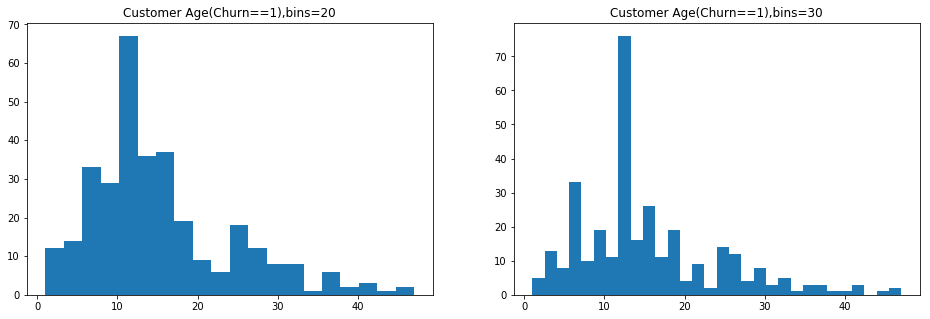

In [14]:
fig,(ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize =(16, 5))
ax0.hist(data[data['Churn']==1]['Customer Age'],bins=20)
ax0.set_title('Customer Age(Churn==1),bins=20')
ax1.hist(data[data['Churn']==1]['Customer Age'],bins=30)
ax1.set_title('Customer Age(Churn==1),bins=30')

> Age segmentation Conculsion:

> 1)We could found 16 are division point in both two cut. 
    
> 2)Since 12 month has maximum frequency, it will be an important month, If we put in first group then first group will be the most risk group, If we put in the second group then second group will be most risk group.I suggest put in the second group, use the age cut young:(0-7], mid:(7-16],old:(16-67] 
    
> Reason: for a small and medium size business like qwe (provide online subscription services), customer who use service for 12 month is a long time,should be paid more attention than new customers.So, it's better to categorize them as another group  

Make a copy of data 

In [15]:
Origidata=data

In [16]:
data.loc[data['Customer Age']<=7,'Customer Age']                                        = 0
data.loc[(data['Customer Age'] > 7) & (data['Customer Age'] <= 16),'Customer Age']      = 1
data.loc[(data['Customer Age'] > 16) & (data['Customer Age'] <= 67), 'Customer Age']    = 2

If we filter data with churn==1 and see the Customer Age distribution,we also get conculsion:mid group has the highest precentage to churn, next one is old group,then the young group

In [17]:
data.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Last Login,CategoricalAge
0,2,0,0,0,0,0,0.0,0.0,0,0,0,31,"(16.0, 67.0]"
1,2,0,62,4,0,0,0.0,0.0,0,0,-16,31,"(16.0, 67.0]"
2,2,0,0,0,0,0,0.0,0.0,0,0,0,31,"(16.0, 67.0]"
3,2,0,231,1,1,-1,3.0,0.0,167,-8,21996,0,"(16.0, 67.0]"
4,2,0,43,-1,0,0,0.0,0.0,0,0,9,31,"(16.0, 67.0]"


In [18]:
data=data.drop(['CategoricalAge'],axis=1) 

Based ont the age segmentation to create 3 new dataframe , Young:(0-7], Mid:(7-16],Old:(16-67]

In [19]:
Young=data[data['Customer Age']==0]
Mid=data[data['Customer Age']==1]
Old=data[data['Customer Age']==2]

### Import churn fatcors for Young:(0-7] 
CHI Score 0-1> CHI Score Month 0> Views 0-1>Logins 0-1

In [25]:
# Initiate model
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

# split data into X and y
X= Young.drop(['Churn'], axis=1)
y=Young['Churn']
X_columns=Young.drop(['Churn'], axis=1).columns.values


#train model
rf.fit(X,y)
et.fit(X,y)
ada.fit(X,y)
gb.fit(X,y)
xg.fit(X,y)

# Get feature importance
rf_features =rf.feature_importances_
et_features = et.feature_importances_
ada_features = ada.feature_importances_
gb_features = gb.feature_importances_
xg_features=xg.feature_importances_

#Get feature importance 

feature_dataframe = pd.DataFrame( {
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'xg Boost feature importances': xg_features,
     'Gradient Boost feature importances': gb_features,
     'features': X_columns
})

# axis = 1 computes the mean row-wise
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by='mean',ascending=False)

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,xg Boost feature importances,mean
2,0.18,0.152342,0.151436,0.161975,CHI Score 0-1,0.228164,0.174783
9,0.08,0.181017,0.222565,0.189670,Views 0-1,0.183601,0.171371
1,0.22,0.135174,0.151570,0.140450,CHI Score Month 0,0.174688,0.164376
7,0.22,0.170317,0.126324,0.171720,Logins 0-1,0.108734,0.159419
10,0.12,0.140740,0.148856,0.134815,Last Login,0.151515,0.139185
8,0.08,0.089535,0.089732,0.055137,Blog Articles 0-1,0.060606,0.075002
4,0.06,0.036524,0.041934,0.055196,Support Cases 0-1,0.048128,0.048357
6,0.02,0.045259,0.030710,0.037924,SP 0-1,0.033868,0.033552
3,0.02,0.028983,0.008593,0.031180,Support Cases Month 0,0.008913,0.019534
5,0.00,0.020111,0.028280,0.021932,SP Month 0,0.001783,0.014421


### Import churn fatcors for Mid:(7-16] 
CHI Score Month 0>Views 0-1>Logins 0-1>CHI Score 0-1

In [ ]:
# Initiate model
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

# split data into X and y
X= Mid.drop(['Churn'], axis=1)
y=Mid['Churn']
X_columns=Mid.drop(['Churn'], axis=1).columns.values


#train model
rf.fit(X,y)
et.fit(X,y)
ada.fit(X,y)
gb.fit(X,y)
xg.fit(X,y)

# Get feature importance
rf_features =rf.feature_importances_
et_features = et.feature_importances_
ada_features = ada.feature_importances_
gb_features = gb.feature_importances_
xg_features=xg.feature_importances_

#Get feature importance 

feature_dataframe = pd.DataFrame( {
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'xg Boost feature importances': xg_features,
     'Gradient Boost feature importances': gb_features,
     'features': X_columns
})

# axis = 1 computes the mean row-wise
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by='mean',ascending=False)

### Import churn fatcors for Young:(16-67] 
Views 0-1> CHI Score Month 0> CHI Score 0-1> Logins 0-1

In [ ]:
# Initiate model
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()

# split data into X and y
X= Old.drop(['Churn'], axis=1)
y=Old['Churn']
X_columns=Old.drop(['Churn'], axis=1).columns.values


#train model
rf.fit(X,y)
et.fit(X,y)
ada.fit(X,y)
gb.fit(X,y)
xg.fit(X,y)

# Get feature importance
rf_features =rf.feature_importances_
et_features = et.feature_importances_
ada_features = ada.feature_importances_
gb_features = gb.feature_importances_
xg_features=xg.feature_importances_

#Get feature importance 

feature_dataframe = pd.DataFrame( {
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
     'AdaBoost feature importances': ada_features,
     'xg Boost feature importances': xg_features,
     'Gradient Boost feature importances': gb_features,
     'features': X_columns
})

# axis = 1 computes the mean row-wise
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1)
feature_dataframe.sort_values(by='mean',ascending=False)

> Particularly import churn fatcors for different age group 

> Conculsion:

> Young:2>1>9>7 (CHI Score 0-1)

> Mid:1>9>7>2 (CHI Score Month 0)
        
> Old:9>1>2>7 (Views 0-1)

### ASS3:A proactive customer retention program should be focused on a small subset of particularly risky customers. Can you identify such a subset? How accurate is your churn prediction mechanism for this subset? (Hint: think and discuss what “accuracy” means in this context)

In [ ]:
data.head()

In [74]:
data[['CHI Score Month 0','Customer Age']].groupby(['Customer Age']).mean()

,CHI Score Month 0
Customer Age,
0,53.138528
1,103.725839
2,109.861902


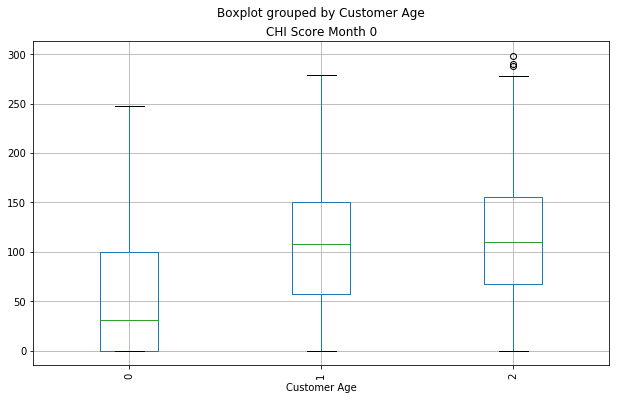

In [75]:
import matplotlib.pyplot as plt
data.boxplot(column='CHI Score Month 0', by='Customer Age', rot=90,figsize=(10,6))

In [ ]:
#pd.qcut(data['CHI Score Month 0'],3)

In [76]:
data[['CHI Score 0-1','Customer Age']].groupby(['Customer Age']).mean()

,CHI Score 0-1
Customer Age,
0,14.870130
1,-0.728891
2,-0.391115


In [ ]:
data.boxplot(column='CHI Score 0-1', by='Customer Age', rot=90,figsize=(10,6))

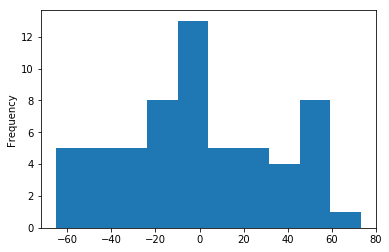

In [77]:
data[(data['Customer Age']==0)&(data['Churn']==1)]['CHI Score 0-1'].plot.hist()

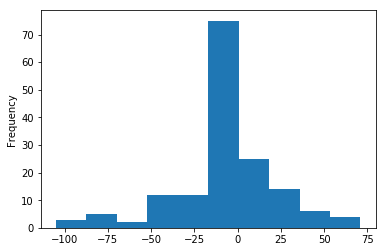

In [78]:
data[(data['Customer Age']==1)&(data['Churn']==1)]['CHI Score 0-1'].plot.hist()

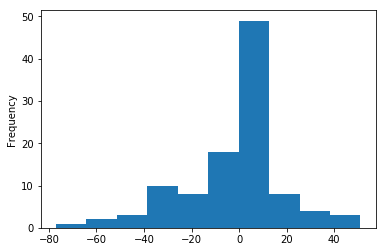

In [79]:
data[(data['Customer Age']==2)&(data['Churn']==1)]['CHI Score 0-1'].plot.hist()

### SMOTE Technique (Over-Sampling):

#### Splitting the Data (Original DataFrame)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Stay', round(data['Churn'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Left', round(data['Churn'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Stay 94.91 % of the dataset
Left 5.09 % of the dataset


In [100]:
X = data.drop('Churn', axis=1)
y = data['Churn']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 222 5818 1386 ... 5934 2586  964] Test: [5613  835  701 ... 6005 4180 5870]
Train: [3868 3385 2151 ...  768 2401   46] Test: [3257 5589 3061 ... 4151 3614 2872]
Train: [4613  648 1890 ...  391  845  726] Test: [2069 5692 1455 ...  292 2130  585]
Train: [2629 2215 5580 ... 2198  569 4428] Test: [3896 5910 5820 ... 2619 3354 2280]
Train: [2242 2296 3452 ...  962 5004  642] Test: [1075 2044 5358 ... 5694 1618 1729]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.94918259 0.05081741]
[0.9488189 0.0511811]


In [108]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Length of X (train): 5077 | Length of y (train): 5077
Length of X (test): 1270 | Length of y (test): 1270


In [109]:
sm = SMOTE('minority')    # 处理过采样的方法
x_train,y_train = sm.fit_sample(original_Xtrain, original_ytrain)
print('通过SMOTE方法平衡正负样本后')
n_sample =len(y_train)
n_pos_sample = y_train[y_train == 0].shape[0]
n_neg_sample = y_train[y_train == 1].shape[0]
print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample, n_pos_sample / n_sample,n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：9638; 正样本占50.00%; 负样本占50.00%


In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
clf1 = DecisionTreeClassifier() # 构建决策树分类器
clf1.fit(x_train, y_train)
predicted1 = clf1.predict(original_Xtest) # 通过分类器产生预测结果
labels = ['Churn=0', 'Churn=1']
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1,original_ytest)))
print(classification_report(original_ytest, predicted1, target_names=labels))
confusion_matrix(predicted1,original_ytest)

Test set accuracy score: 0.88583
             precision    recall  f1-score   support

    Churn=0       0.95      0.93      0.94      1205
    Churn=1       0.10      0.15      0.12        65

avg / total       0.91      0.89      0.90      1270



array([[1115,   55],
       [  90,   10]], dtype=int64)

In [111]:
clf2 = LogisticRegression() # 构建逻辑回归分类器
clf2.fit(x_train, y_train)
predicted1 = clf2.predict(original_Xtest) # 通过分类器产生预测结果
labels = ['Churn=0', 'Churn=1']
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1,original_ytest)))
print(classification_report(original_ytest, predicted1, target_names=labels))

Test set accuracy score: 0.54803
             precision    recall  f1-score   support

    Churn=0       0.96      0.54      0.70      1205
    Churn=1       0.07      0.62      0.12        65

avg / total       0.92      0.55      0.67      1270



In [105]:
clf3 = KNeighborsClassifier() # 构建KNN分类器
clf3.fit(x_train, y_train)
predicted1 = clf3.predict(original_Xtest) # 通过分类器产生预测结果
labels = ['Churn=0', 'Churn=1']
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1,original_ytest)))
print(classification_report(original_ytest, predicted1, target_names=labels))

Test set accuracy score: 0.75827
             precision    recall  f1-score   support

    Churn=0       0.96      0.78      0.86      1205
    Churn=1       0.09      0.38      0.14        65

avg / total       0.91      0.76      0.82      1270



In [82]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_lr= RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE('minority'), rand_lr) # SMOTE happens during Cross Validation not before.
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_lr.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.6844488188976378
precision: 0.08416662239701586
recall: 0.523076923076923
f1: 0.1444190310878794
---------------------------------------------------------------------------------------------------------------------------------------


In [83]:
labels = ['Churn=0', 'Churn=1']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

             precision    recall  f1-score   support

    Churn=0       0.97      0.68      0.80      1205
    Churn=1       0.10      0.66      0.17        65

avg / total       0.93      0.67      0.77      1270



### Random Undersampling

In [106]:
new_df= data.sample(frac=1)

# amount of fraud classes 492 rows.
Left_df = new_df.loc[new_df['Churn'] == 1]
Stay_df = new_df.loc[new_df['Churn'] == 0][:323]

normal_distributed_df = pd.concat([Left_df, Stay_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_X = new_df.drop('Churn', axis=1).values
new_y = new_df['Churn'].values

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [99]:
new_df.head()

,Customer Age,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Last Login
2243,2,0,16,-38,0,0,0.0,0.0,0,0,3,31
1936,2,0,118,-3,0,0,0.0,0.0,7,0,-14,-1
5956,0,0,0,0,0,0,0.0,0.0,0,0,0,0
3848,0,1,135,-1,2,2,3.0,3.0,-45,0,17,-4
4816,0,1,121,47,0,-1,0.0,-2.0,9,1,53,1


In [113]:
original_ytest.value_counts()

0    1205
1      65
Name: Churn, dtype: int64

In [124]:
from sklearn.metrics import confusion_matrix
estimator1 = DecisionTreeClassifier()
estimator1.fit(new_X_train, new_y_train)
y_pred = estimator1.predict(original_Xtest)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,original_ytest)))
print(classification_report(original_ytest, y_pred, target_names=labels))
confusion_matrix(y_pred,original_ytest)

Test set accuracy score: 0.67717
             precision    recall  f1-score   support

    Churn=0       1.00      0.66      0.80      1205
    Churn=1       0.14      1.00      0.24        65

avg / total       0.96      0.68      0.77      1270



array([[795,   0],
       [410,  65]], dtype=int64)

### Best score

In [187]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), tree_params)
grid_tree.fit(new_X_train, new_y_train)
tree_clf = grid_tree.best_estimator_
tree_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [160]:
from sklearn.metrics import confusion_matrix
estimator4 = RandomForestClassifier()
estimator4.fit(new_X_train, new_y_train)
y_pred = estimator4.predict(original_Xtest)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,original_ytest)))
print(classification_report(original_ytest, y_pred, target_names=labels))
confusion_matrix(y_pred,original_ytest)

Test set accuracy score: 0.73858
             precision    recall  f1-score   support

    Churn=0       1.00      0.73      0.84      1205
    Churn=1       0.16      0.98      0.28        65

avg / total       0.96      0.74      0.81      1270



array([[874,   1],
       [331,  64]], dtype=int64)

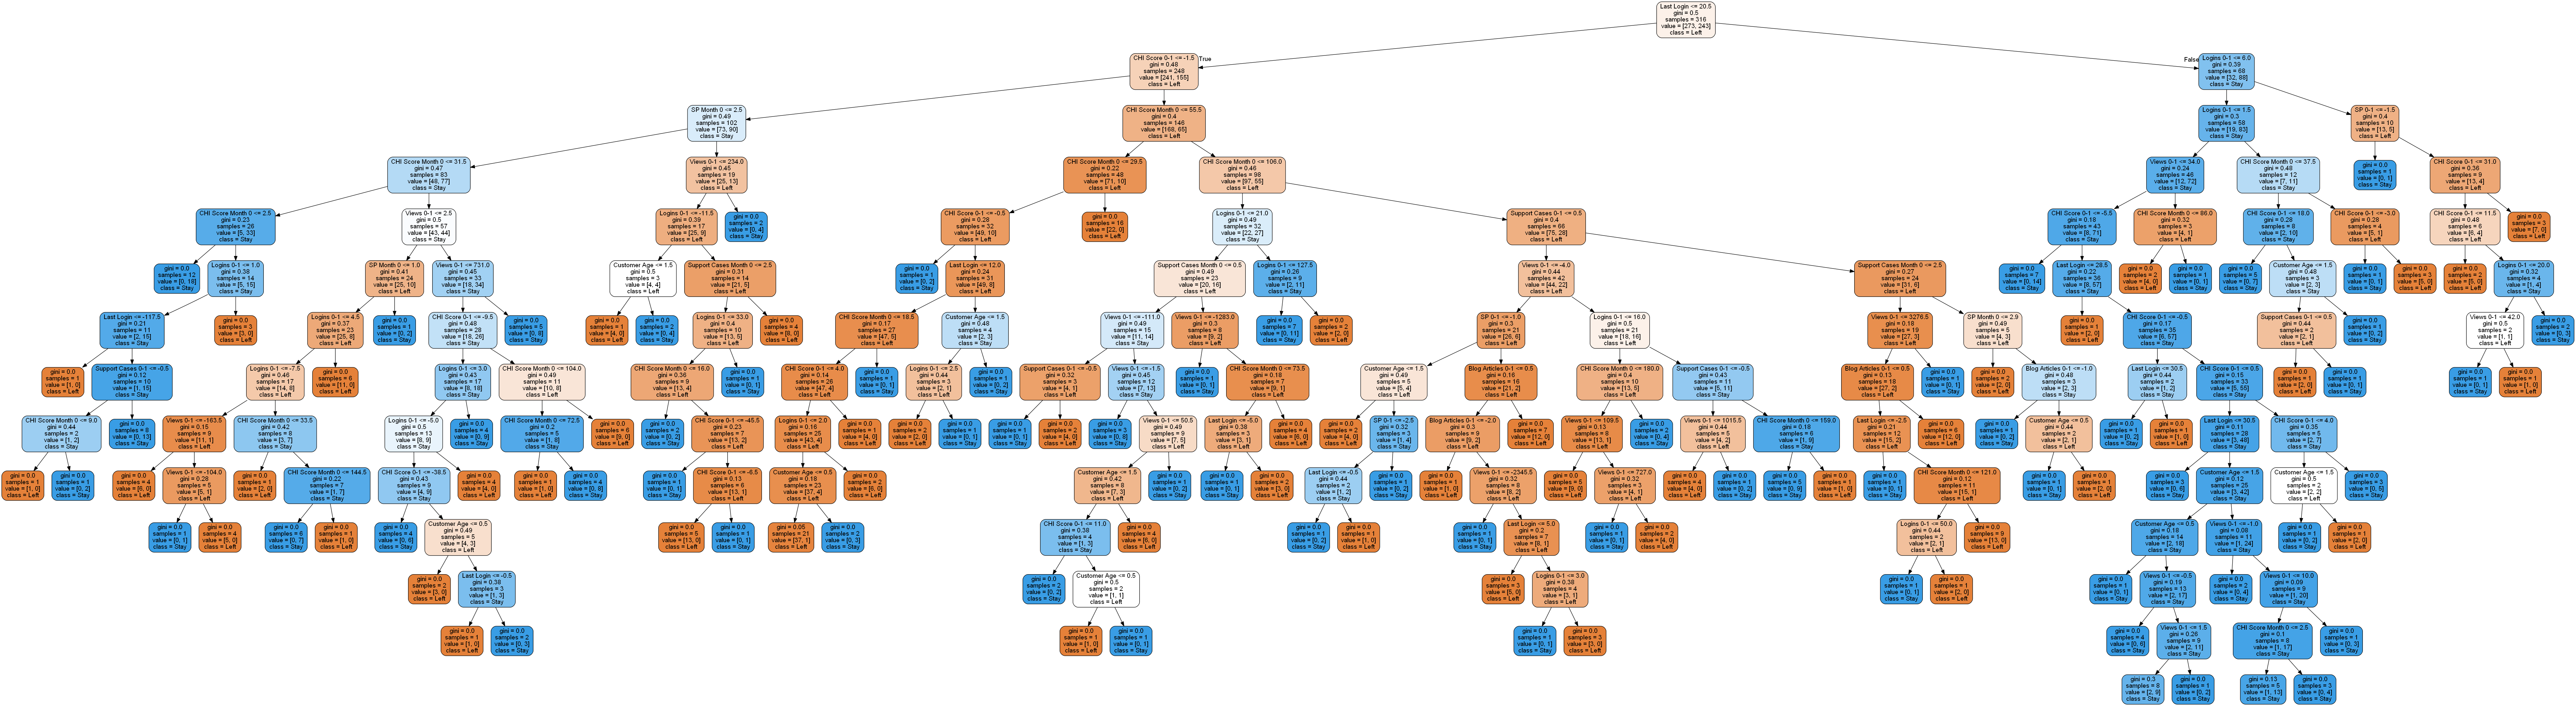

In [181]:
from sklearn import tree
import pydotplus
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(new_X_train, new_y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = tree.export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display in jupyter notebook
from IPython.display import Image
Image(graph.create_png())

In [192]:
from sklearn.metrics import confusion_matrix
estimator4 = tree_clf
estimator4.fit(new_X_train, new_y_train)
y_pred = estimator4.predict(original_Xtest)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,original_ytest)))
print(classification_report(original_ytest, y_pred, target_names=labels))
confusion_matrix(y_pred,original_ytest)

Test set accuracy score: 0.79134
             precision    recall  f1-score   support

    Churn=0       0.97      0.80      0.88      1205
    Churn=1       0.14      0.60      0.23        65

avg / total       0.93      0.79      0.85      1270



array([[966,  26],
       [239,  39]], dtype=int64)

In [180]:
feature_names=new_df.drop('Churn',axis=1).columns
target_names=['Left','Stay']

In [190]:
new_y_train.shape

(516,)

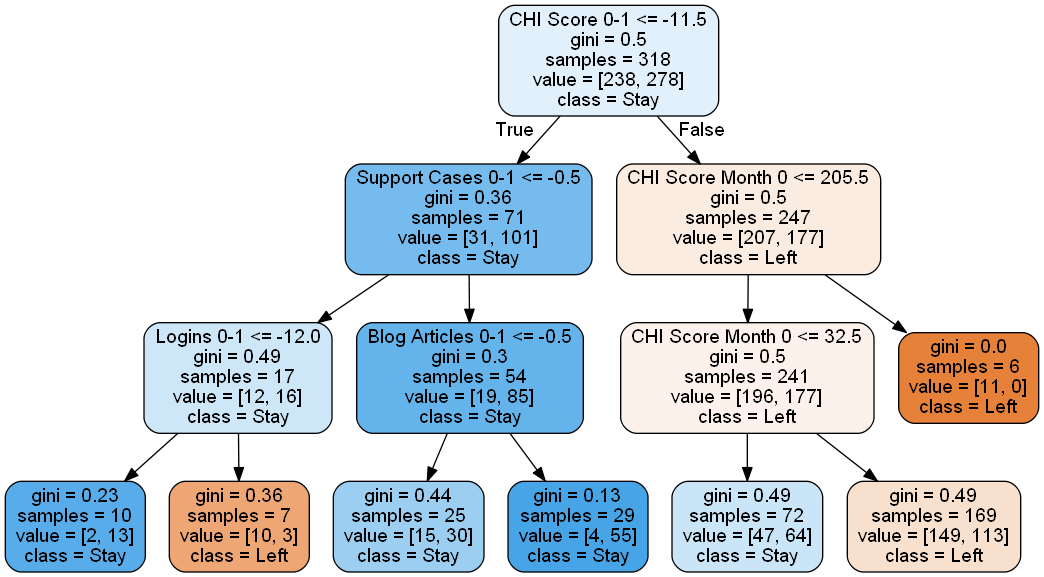

In [186]:
from sklearn.ensemble import RandomForestClassifier
model =tree_clf

# Train
model.fit(new_X_train, new_y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = tree.export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display in jupyter notebook
from IPython.display import Image
Image(graph.create_png())

In [119]:
estimator2 = LogisticRegression()
estimator2.fit(new_X_train, new_y_train)
y_pred = estimator2.predict(original_Xtest)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,original_ytest)))
print(classification_report(original_ytest, y_pred, target_names=labels))
confusion_matrix(y_pred,original_ytest)

Test set accuracy score: 0.54724
             precision    recall  f1-score   support

    Churn=0       0.96      0.54      0.69      1205
    Churn=1       0.07      0.62      0.12        65

avg / total       0.92      0.55      0.67      1270



array([[655,  25],
       [550,  40]], dtype=int64)

In [120]:
estimator3 = KNeighborsClassifier()
estimator3.fit(new_X_train, new_y_train)
y_pred = estimator3.predict(original_Xtest)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,original_ytest)))
print(classification_report(original_ytest, y_pred, target_names=labels))
confusion_matrix(y_pred,original_ytest)

Test set accuracy score: 0.65906
             precision    recall  f1-score   support

    Churn=0       0.97      0.66      0.79      1205
    Churn=1       0.09      0.66      0.17        65

avg / total       0.93      0.66      0.75      1270



array([[794,  22],
       [411,  43]], dtype=int64)

## Mid subset data 

In [144]:
Mid= Mid.sample(frac=1)
X_mid=Mid.drop('Churn',axis=1)
y_mid=Mid['Churn']
mid_X_train, mid_X_test, mid_y_train, mid_y_test=train_test_split(X_mid,y_mid, test_size=0.2, random_state=42)

In [145]:
# amount of fraud classes 492 rows.
Left_df = Mid.loc[Mid['Churn'] == 1]
Stay_df = Mid.loc[Mid['Churn'] == 0][:158]

normal_distributed_df = pd.concat([Left_df, Stay_df])

# Shuffle dataframe rows
new_mid_df = normal_distributed_df.sample(frac=1, random_state=42)

new_mid_X = new_mid_df.drop('Churn', axis=1).values
new_mid_y = new_mid_df['Churn'].values

new_mid_X_train, new_mid_X_test, new_mid_y_train, new_mid_y_test = train_test_split(new_mid_X, new_mid_y, test_size=0.2, random_state=42)

In [146]:
estimator1 = DecisionTreeClassifier()
estimator1.fit(new_mid_X_train, new_mid_y_train)
y_pred = estimator1.predict(mid_X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,mid_y_test)))
print(classification_report(mid_y_test, y_pred, target_names=labels))
confusion_matrix(y_pred,mid_y_test)

Test set accuracy score: 0.65736
             precision    recall  f1-score   support

    Churn=0       0.98      0.64      0.77       363
    Churn=1       0.17      0.87      0.29        31

avg / total       0.92      0.66      0.74       394



array([[232,   4],
       [131,  27]], dtype=int64)

### Best score

In [153]:
rand= RandomForestClassifier()
rand.fit(new_mid_X_train, new_mid_y_train)
y_pred = rand.predict(mid_X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,mid_y_test)))
print(classification_report(mid_y_test,y_pred, target_names=labels))
confusion_matrix(y_pred,mid_y_test)

Test set accuracy score: 0.75127
             precision    recall  f1-score   support

    Churn=0       0.99      0.74      0.85       363
    Churn=1       0.23      0.90      0.36        31

avg / total       0.93      0.75      0.81       394



array([[268,   3],
       [ 95,  28]], dtype=int64)

In [156]:
et= ExtraTreesClassifier()
et.fit(new_mid_X_train, new_mid_y_train)
y_pred = et.predict(mid_X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_pred,mid_y_test)))
print(classification_report(mid_y_test,y_pred, target_names=labels))
confusion_matrix(y_pred,mid_y_test)

Test set accuracy score: 0.72081
             precision    recall  f1-score   support

    Churn=0       0.98      0.71      0.82       363
    Churn=1       0.20      0.87      0.33        31

avg / total       0.92      0.72      0.78       394



array([[257,   4],
       [106,  27]], dtype=int64)

In [178]:
feature_names=Mid.drop('Churn',axis=1).columns
feature_names
target_names=['Stay', 'Left']

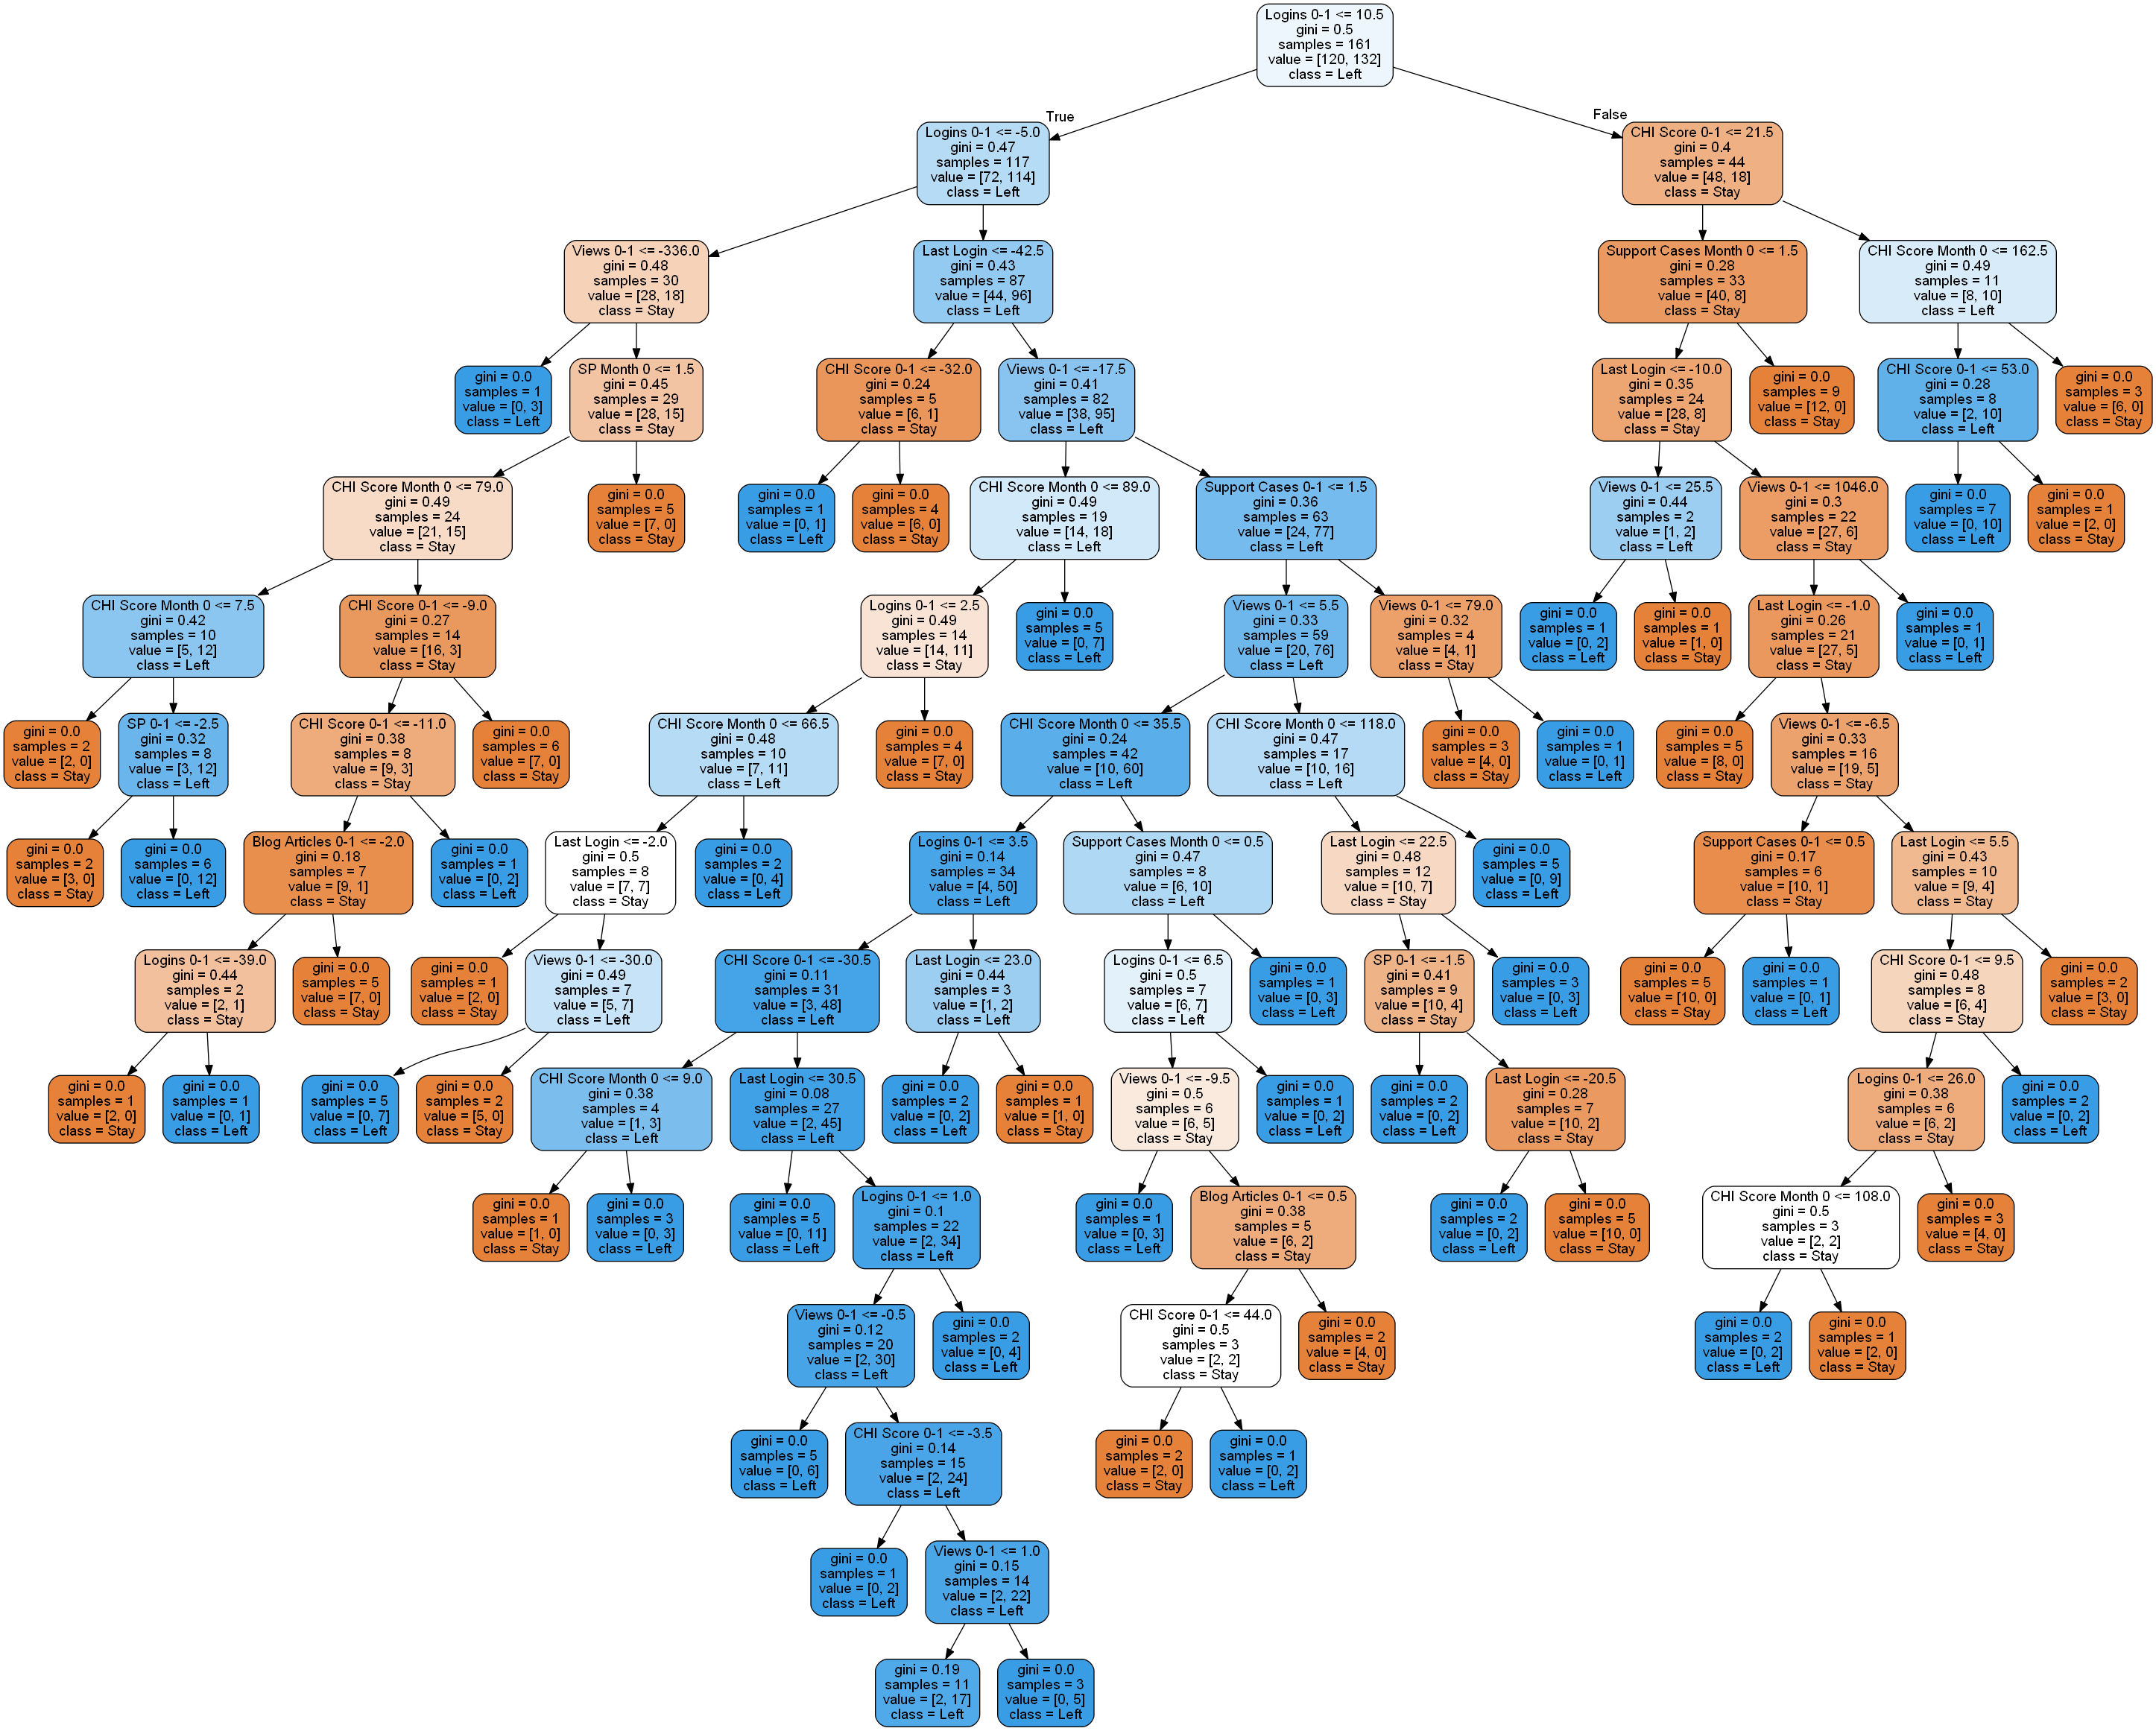

In [179]:
from sklearn import tree
import pydotplus
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(new_mid_X_train, new_mid_y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
dot_data = tree.export_graphviz(estimator, out_file=None, 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Display in jupyter notebook
from IPython.display import Image
Image(graph.create_png())
